### In this Notebook you will find application of:
##### 1. KNN
##### 2. Support Vector Machines (SVM)
##### 3. Naive Bayes
##### 4. Decision Tree
##### 5. Random Forest 
##### Classification Algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_knn = pd.read_csv('logistic-reg-data.csv')

### Let's explore the data first

In [2]:
data_knn.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data_knn.shape

(569, 33)

In [10]:
data_knn.diagnosis.unique()

array(['M', 'B'], dtype=object)

Data consists of 33 columns and 569 observations. It is a medical data and according to 31 features we will try to predict the class of __'diagnosis'__ column. __'B'__ stands for __'benign'__ (which means good diagnosis), __'M'__ stands for __'malicious'__ (which means bad diagnosis). I will use some features to show the application of many classification algortihms.

### Drop unnecessary columns : 'id', 'Unnamed: 32'

In [11]:
data_knn.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
data_knn.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Let's select a feature to work with and plot the data

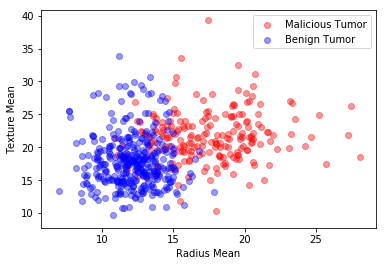

In [13]:
M = data_knn[data_knn.diagnosis == 'M']
B = data_knn[data_knn.diagnosis == 'B']


plt.scatter(M.radius_mean, M.texture_mean, color = 'red', label = 'Malicious Tumor', alpha = 0.4)
plt.scatter(B.radius_mean, B.texture_mean, color = 'blue', label = 'Benign Tumor', alpha = 0.4)
plt.legend()
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()

To shortly describe, these features are measurements of tumor sizes and are mostly medical terms. WE don't need to understand perfecty for now.

In [14]:
data_knn.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [17]:
data_knn.diagnosis = [1 if each == 'M' else 0 for each in data_knn.diagnosis]
# ALTERNATIVELY: data_knn.diagnosis = data_knn.diagnosis.map({'M':1, 'B':0})
data_knn.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [18]:
y = data_knn.diagnosis.values
x_unscaled = data_knn.drop('diagnosis', axis=1)

### Normalize
##### Between 0 and 1

In [19]:
x = (x_unscaled-np.min(x_unscaled))/(np.max(x_unscaled)-np.min(x_unscaled))

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# 1. KNN Classification

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
# predicted_y_values = knn.predict(x_test) 
print('KNN score with K=3 Neighbors: {}'.format(knn.score(x_test, y_test)))

KNN score with K=3 Neighbors: 0.9649122807017544


### Finding optimal value for 'n_neighbors' parameter:

With K=3 neighbors we achieved a good prediction rate. __But is it the best parameter?__ Below we seek for best number of neighbors.

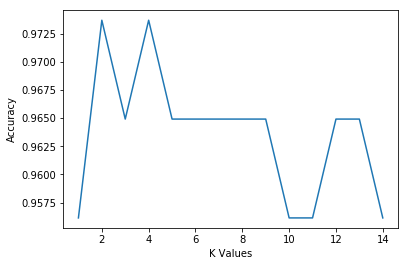

In [23]:
score_list=[]

# Taking advantage of For Loops:
for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
    
# Plotting the findings:    
plt.plot(range(1,15),score_list)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.show()

K  = 2 or 4  Neighbors seems like optimal.

In [26]:
print('K=2 KNN Score: {}\nK=4 KNN Score: {}'.format(score_list[1], score_list[3]))

K=2 KNN Score: 0.9736842105263158
K=4 KNN Score: 0.9736842105263158


# 2. Support Vector Machines Classification

In [27]:
from sklearn.svm import SVC

svm_model = SVC(random_state = 42)
svm_model.fit(x_train, y_train)

print("Accuracy of SVM: ", svm_model.score(x_test, y_test))

Accuracy of SVM:  0.9649122807017544


C:\Users\yigit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 3. Naive Bayes Classification

In [28]:
from sklearn.naive_bayes import GaussianNB

nb =GaussianNB()
nb.fit(x_train, y_train)
print('Naive Bayes Score: ', nb.score(x_test, y_test))

Naive Bayes Score:  0.9649122807017544


# 4. Decision Tree Classification

In [29]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print('Dec. Tree Classification Score is {}'.format(dt.score(x_test, y_test)))

Dec. Tree Classification Score is 0.9385964912280702


# 5. Random Forest Classification

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(x_train, y_train)

print('Random Forest score: {}'.format(rf.score(x_test, y_test)))

Random Forest score: 0.9649122807017544


### Finding optimal value for 'n_estimators' parameter:

Maximum accuracy: 0.9649122807017544 
Minimum n_estimator: 4


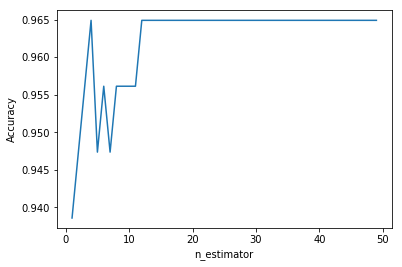

In [32]:
list_of_scores = []
n_list = []
largest = 0

for a in range (1,50):
    rf = RandomForestClassifier(n_estimators = a, random_state = 42)
    rf.fit(x_train, y_train)
    list_of_scores.append(rf.score(x_test, y_test))
    n_list.append(a)
    if (rf.score(x_test, y_test))>largest:
        largest = rf.score(x_test, y_test)
        number = a
        
print('Maximum accuracy: {} \nMinimum n_estimator: {}'.format(largest, number))

    
plt.plot(n_list, list_of_scores)
plt.xlabel('n_estimator')
plt.ylabel('Accuracy')
plt.show()    

Looks like 96.5% accuracy occurs firstly at n_estimators 4, then drops, and then reaches the same accuracy after a while and don't change anymore. In this case choosing the smallest number of estimators possible makes sense in terms of computational optimality.

### Confusion Matrix (through a Heatmap)

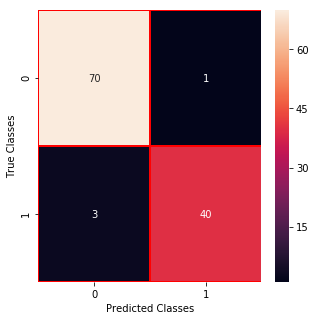

In [33]:
rf = RandomForestClassifier(n_estimators = 4, random_state = 42)
rf.fit(x_train, y_train)
# rf.score(x_test, y_test)

y_pred = rf.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

import seaborn as sns
# import matplotlib.pyplot as plt

f, axx=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot= True, linewidths=0.5, linecolor='red', fmt= '0.0f', ax=axx)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [37]:
x_test.shape

(114, 30)

Out of 114 observations from TEST SPLIT, 70+40= 110 of them was predicted correctly. 3 false negatives and 1 false positive.
occurances. __110/144 = 0.965__ was our score we found previously.

Feel free to use other features for prediction of classes on your personal works.